# Fetch Rewards Coding Exercise

In the Notebook, I read three different raw data in JSON format, including receipts, Users, and Brands. 

First, I will do data preprocessing using two different approaches (using the pandas package and "with open" to read the dataset). Second, I will capture some data quality issues. Third, I will analyze the data and answer the question - Which brand has the most transactions among users who were created within the past 6 months using MySQL and share it with our business stakeholders? Last, a couple of clarifying questions and insights will be drafted in the email.

In [1]:
# Make sure the package is autoload
%load_ext autoreload
%autoreload 2

### Import Library

- I create the dqcheck.py, which help the notebook to be easy to read and the dqcheck file can reuse for other analysis. (Feel free to take a look at dqcheck.py)|

In [2]:
import dqcheck
import pandas as pd
from datetime import datetime
import json

# 1. Read in data

- In this section, I will read three different files. ERD is planned in a different file (pdf). 

### Loads Receipts data

- I create an additional  Items table to capture the information in the Item list column that each of the receipt numbers contains.


In [3]:
fileName = 'receipts.json'

In [4]:
# Check the json format to help do data preprocessing / 
# Create the Receipts, we can also load data using python from scratch, but here we just want to understand the format
r = dqcheck.Receipts(fileName)

In [5]:
r.data[0]

{'_id': {'$oid': '5ff1e1eb0a720f0523000575'},
 'bonusPointsEarned': 500,
 'bonusPointsEarnedReason': 'Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)',
 'createDate': {'$date': 1609687531000},
 'dateScanned': {'$date': 1609687531000},
 'finishedDate': {'$date': 1609687531000},
 'modifyDate': {'$date': 1609687536000},
 'pointsAwardedDate': {'$date': 1609687531000},
 'pointsEarned': '500.0',
 'purchaseDate': {'$date': 1609632000000},
 'purchasedItemCount': 5,
 'rewardsReceiptItemList': [{'barcode': '4011',
   'description': 'ITEM NOT FOUND',
   'finalPrice': '26.00',
   'itemPrice': '26.00',
   'needsFetchReview': False,
   'partnerItemId': '1',
   'preventTargetGapPoints': True,
   'quantityPurchased': 5,
   'userFlaggedBarcode': '4011',
   'userFlaggedNewItem': True,
   'userFlaggedPrice': '26.00',
   'userFlaggedQuantity': 5}],
 'rewardsReceiptStatus': 'FINISHED',
 'totalSpent': '26.00',
 'userId': '5ff1e1eacfcf6c399c274ae6'}

In [6]:
# read in receipts file using pandas package 
receipts = pd.read_json('receipts.json', lines=True)
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [7]:
# doing data prerpocessing 
date_columns = ['createDate', 'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate', 'purchaseDate']
receipt_df = dqcheck.preprocess(receipts, dateColumns = date_columns)

In [8]:
receipt_df.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 09:25:31,2021-01-03 09:25:31,2021-01-03 09:25:31,2021-01-03 09:25:36,2021-01-03 09:25:31,500.0,2021-01-02 18:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 09:24:43,2021-01-03 09:24:43,2021-01-03 09:24:43,2021-01-03 09:24:48,2021-01-03 09:24:43,150.0,2021-01-02 09:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 09:25:37,2021-01-03 09:25:37,NaT,2021-01-03 09:25:42,NaT,5.0,2021-01-02 18:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 09:25:34,2021-01-03 09:25:34,2021-01-03 09:25:34,2021-01-03 09:25:39,2021-01-03 09:25:34,5.0,2021-01-02 18:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 09:25:06,2021-01-03 09:25:06,2021-01-03 09:25:11,2021-01-03 09:25:11,2021-01-03 09:25:06,5.0,2021-01-02 09:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [9]:
# get the item dataframe
item_df = dqcheck.create_item_df(receipt_df)
item_df.head()

,_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5ff1e1bb0a720f052300056b,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1,028400642255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5ff1e1f10a720f052300057a,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# check the lens of itme list
len(item_df)

6941

### Load Brands data

In this part, we can see inside CPG has a nested dictionary. I consider that there exists another table, hence I decompose the CPG dictionary and add the CPG reference columns.

In [11]:
# load the brand df
# different approach, without using pd.read_json. / read the data using with open .. using python from scratch
fileName = 'brands.json'
b = dqcheck.Brand(fileName)

In [12]:
# check the data format
b.data[0]

{'_id': {'$oid': '601ac115be37ce2ead437551'},
 'barcode': '511111019862',
 'category': 'Baking',
 'categoryCode': 'BAKING',
 'cpg': {'$id': {'$oid': '601ac114be37ce2ead437550'}, '$ref': 'Cogs'},
 'name': 'test brand @1612366101024',
 'topBrand': False}

In [13]:
brand_df = b.create_df()
brand_df.head()

,_id,barcode,brandCode,category,categoryCode,topBrand,cpg,cpg_ref,name
0,601ac115be37ce2ead437551,511111019862,None,Baking,BAKING,False,601ac114be37ce2ead437550,Cogs,test brand @1612366101024
1,601c5460be37ce2ead43755f,511111519928,STARBUCKS,Beverages,BEVERAGES,False,5332f5fbe4b03c9a25efd0ba,Cogs,Starbucks
2,601ac142be37ce2ead43755d,511111819905,TEST BRANDCODE @1612366146176,Baking,BAKING,False,601ac142be37ce2ead437559,Cogs,test brand @1612366146176
3,601ac142be37ce2ead43755a,511111519874,TEST BRANDCODE @1612366146051,Baking,BAKING,False,601ac142be37ce2ead437559,Cogs,test brand @1612366146051
4,601ac142be37ce2ead43755e,511111319917,TEST BRANDCODE @1612366146827,Candy & Sweets,CANDY_AND_SWEETS,False,5332fa12e4b03c9a25efd1e7,Cogs,test brand @1612366146827


### Load User Data

In [14]:
users_df = pd.read_json('users.json', lines=True)
users_df.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [15]:
date_columns = ['createdDate', 'lastLogin']
users_df = dqcheck.preprocess(users_df, dateColumns = date_columns)

In [16]:
users_df.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 09:24:04.800,2021-01-03 09:25:37.858,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 09:24:04.800,2021-01-03 09:25:37.858,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 09:24:04.800,2021-01-03 09:25:37.858,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 09:25:30.554,2021-01-03 09:25:30.597,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 09:24:04.800,2021-01-03 09:25:37.858,consumer,Email,WI


#  2. Evaluate Data Quality Issues

In this section, I captured the null values, and duplicated values for each of the tables, and check if the DateTime data make sense in the receipts table. I assume that those checks I examined are not guaranteed in the pipeline since it is useless to do the same check and will just waste computation.

##### (1) Null Check
First, for most of the data frames, the missing value can be an issue. As we can see, in the item table, the percentage of some columns is over 90%, which means some of the column can be useless. We can remove the useless column to reduce the memory storage in our platform. Moreover, if there are too many missing values, we will miss important information when joining the table. For instance, when we try to join item table with brand table on barcode columns, we will miss around 60% of our infomration in the dataset. This will be an issue when I try to answering the question "Which brand has the most transactions among users who were created within the past 6 months?".

##### (1) Duplicate Check
Second, we check the duplicate values for each of the tables. By checking the duplicate value, we can reduce the memory storage, and understand if there is any data ingestion problem. Plus, the duplicate value will have a huge impact on future analysis, such as doing exploratory data analysis and building a machine learning model.More details will be explore in the latter section.

##### (1) Datetime Check
Third, I examined the DateTime data to check if the data make sense. For instance, the receipt-created date cannot be earlier than the product purchase date. However, this rely on the business domain and it is worth checking with the business stakeholders to make sure the DateTime data make sense.

### Checking Missing Value

_id                         0.00
createDate                  0.00
dateScanned                 0.00
modifyDate                  0.00
rewardsReceiptStatus        0.00
userId                      0.00
totalSpent                 38.87
rewardsReceiptItemList     39.32
purchaseDate               40.04
purchasedItemCount         43.25
pointsEarned               45.58
finishedDate               49.24
bonusPointsEarned          51.39
bonusPointsEarnedReason    51.39
pointsAwardedDate          52.01
dtype: float64


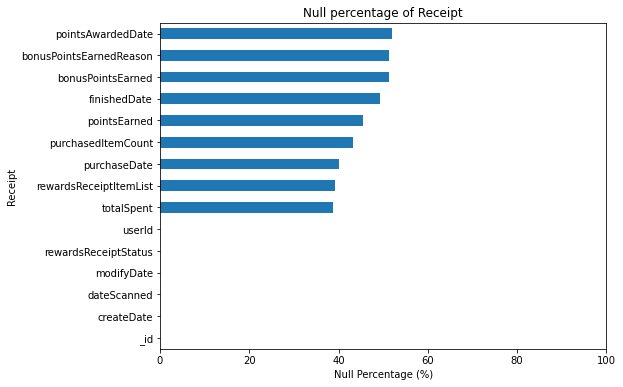

<Figure size 576x432 with 0 Axes>

In [17]:
dqcheck.nullCheck(receipt_df, 'Receipt')

_id                                    0.00
partnerItemId                          0.00
finalPrice                             2.51
itemPrice                              2.51
quantityPurchased                      2.51
description                            5.49
discountedItemPrice                   16.89
originalReceiptItemText               17.01
barcode                               55.48
brandCode                             62.54
rewardsProductPartnerId               67.31
rewardsGroup                          75.06
pointsPayerId                         81.75
priceAfterCoupon                      86.23
pointsEarned                          86.64
metabriteCampaignId                   87.57
needsFetchReview                      88.29
competitiveProduct                    90.71
targetPrice                           94.55
preventTargetGapPoints                94.84
pointsNotAwardedReason                95.10
userFlaggedBarcode                    95.14
userFlaggedNewItem              

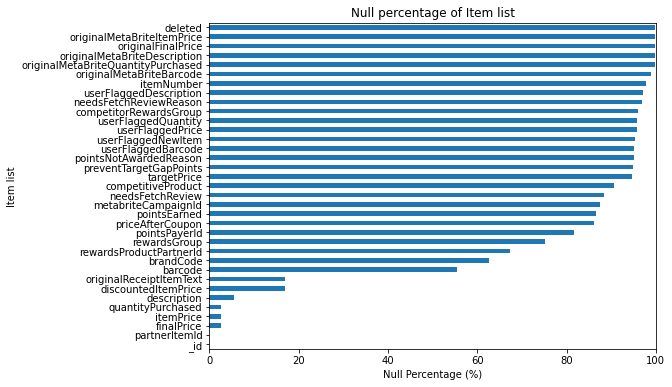

<Figure size 576x432 with 0 Axes>

In [18]:
dqcheck.nullCheck(item_df, 'Item list')

_id              0.00
barcode          0.00
cpg              0.00
cpg_ref          0.00
name             0.00
category        13.28
brandCode       20.05
topBrand        52.44
categoryCode    55.70
dtype: float64


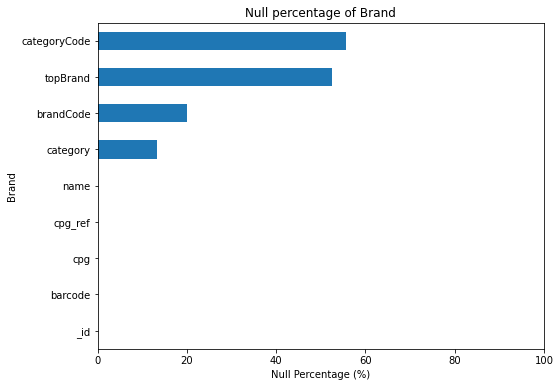

<Figure size 576x432 with 0 Axes>

In [19]:
dqcheck.nullCheck(brand_df, 'Brand')

_id              0.00
active           0.00
createdDate      0.00
role             0.00
signUpSource     9.70
state           11.31
lastLogin       12.53
dtype: float64


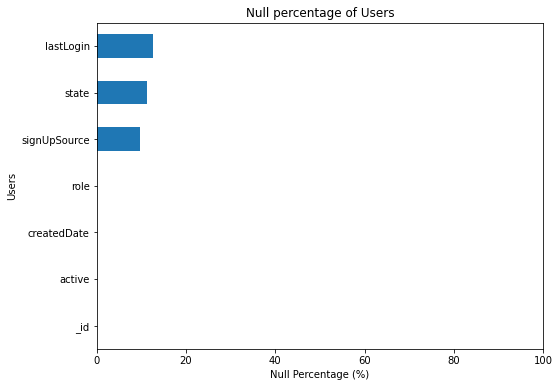

<Figure size 576x432 with 0 Axes>

In [20]:
dqcheck.nullCheck(users_df, 'Users')

### Checking Duplicate

- Holidays often cause data quality errors because the have more/fewer data than other days. We can view that in the user's data most of the duplicate values happened from Nov to Jan. I assume most of the users will shop in quarter 4 and might scan their receipt in the coming month, for instance, January. Hence, it is important to come out with a solution for duplicate value checks during holidays or any seasonality effect.

In [21]:
new_receipt_df = receipt_df.drop(columns=['rewardsReceiptItemList'])

In [22]:
merge_receipt_item_df = pd.merge(new_receipt_df, item_df, left_on = '_id', right_on='_id', how='left')

In [23]:
# check duplicate for receipts
merge_receipt_item_df.duplicated().sum()

# if exist call the function to drop

# length_before = len(receipt_df)
# # receipt_df.drop_duplicates(keep=False, inplace=True)
# length_after = len(new_receipt_df)

# print("before: ", length_before, "\nafter: ", length_after)

0

In [24]:
# check duplicate for brands
dqcheck.duplicateCheck(brand_df)

0

In [25]:
# check duplicate for users
dqcheck.duplicateCheck(users_df)

283

In [26]:
duplicate_df = users_df[users_df.duplicated()]
duplicate_df['month'] = pd.to_datetime(duplicate_df['createdDate']).apply(lambda x: x.month)

<ipython-input-26-aabd35eebeb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df['month'] = pd.to_datetime(duplicate_df['createdDate']).apply(lambda x: x.month)


In [27]:
duplicate_df['month'].value_counts()

1     185
12     45
11     20
9      17
2      16
Name: month, dtype: int64

In [28]:
# Do the data quality check

In [29]:
# check the percentage of missing value 
# set up the threshold for each cutoff (80% can be an issue) / understand the schema of rewardsreceiptitemlist

df = round(receipt_df.isnull().sum() / len(receipt_df) * 100, 2).sort_values(ascending=True)


### Checking DateTime

purchase date cannot be earlier than any other date but can be on the same day.

In [30]:
# datecheck -  can do a lot ... just show few examples
# cannot other date in receipte cannot before purchase date
len(receipt_df[receipt_df['purchaseDate'] > receipt_df['createDate']])

13

In [31]:
len(receipt_df[receipt_df['purchaseDate'] > receipt_df['dateScanned']])

13

In [32]:
len(receipt_df[receipt_df['purchaseDate'] > receipt_df['finishedDate']])

7

In [33]:
len(receipt_df[receipt_df['purchaseDate'] > receipt_df['modifyDate']])

13

In [34]:
# you cannot modify before you create receipt
len(receipt_df[receipt_df['modifyDate'] > receipt_df['createDate']])

508

In [35]:
# users date frame
len(users_df[users_df['createdDate'] > users_df['lastLogin']])

0

# 3. Answer business stakeholder

### Which brand has the most transactions among users who were created within the past 6 months?

In [36]:
"""
1. get the user within 6 month
2. get the brand for each item that was purchase by these user only (join)
3. count the number of these items

-- get the most recent users
WITH user_tb AS (
SELECT r.userID, _id
FROM Receipts r
JOIN Users u
ON r.userId = u.User_id
WHERE DATE_ADD(DATE(u.createdDate), INTERVAL 6 MONHT) >= CURDATE())
,
-- get the brand for each order(barcode)
brand_tb AS (
SELECT _id, i.barcode, b.brandCode
FROM items i
LEFT JOIN Brands b
ON i.barcode = b.barcode)
,
-- join two table filter out the order not purchased by the most recent users
transaction_rnk_tb AS (
SELECT brandCode, COUNT(barcode), RANK() OVER(ORDER BY COUNT(barcode) DESC) AS 'rnk'
FROM user_tb u
JOIN brand_tb b
ON u._id = b._id
GROUP BY brandCode)

SELECT brandCode
FROM transaction_rnk_tb
WHERE rnk = 1
"""

"\n1. get the user within 6 month\n2. get the brand for each item that was purchase by these user only (join)\n3. count the number of these items\n\n-- get the most recent users\nWITH user_tb AS (\nSELECT r.userID, _id\nFROM Receipts r\nJOIN Users u\nON r.userId = u.User_id\nWHERE DATE_ADD(DATE(u.createdDate), INTERVAL 6 MONHT) >= CURDATE())\n,\n-- get the brand for each order(barcode)\nbrand_tb AS (\nSELECT _id, i.barcode, b.brandCode\nFROM items i\nLEFT JOIN Brands b\nON i.barcode = b.barcode)\n,\n-- join two table filter out the order not purchased by the most recent users\ntransaction_rnk_tb AS (\nSELECT brandCode, COUNT(barcode), RANK() OVER(ORDER BY COUNT(barcode) DESC) AS 'rnk'\nFROM user_tb u\nJOIN brand_tb b\nON u._id = b._id\nGROUP BY brandCode)\n\nSELECT brandCode\nFROM transaction_rnk_tb\nWHERE rnk = 1\n"

# 4. Communicate with Stakeholders

Lastly, I will construct an email to the business stakeholders to update my work and share some of my concerns with the data. This section helps us to know if we can communicate with stakeholders that is understandable to a product or business leader who isn’t familiar with my day to day work. 

Hi Teams,

This is Calvin. I've been working on the rewards data, including receipts, users, and brands, that I was given a few days ago. I would like to update my progress and few questions would like to clarify.

#### Request for more Data (Perfomance issue)
1. Is there a list of attributes for item-specific information, such as description, item price, final price, etc). We can potentially speed up the data collection time if we have a chance to access this list.

#### Data Quality Issue

1. **Missing value:** Most of the key attributes in the item-specific dataset are missing. I would like to understand the root cause of this, which can come up the solution of those missing value. Second, over half of the items do not have a barcode. This can lead to problems when creating the relationship between tables and further impact the data analysis. 

2. **DateTime date:** Related to the DateTime data. Is it possible to have a receipt created date before the customer purchase the item? Do we have the order of dates which should happen first? I assume that the customer purchase date should not happen before any other action date(created, scanned, modified) in the receipts table. However, there are a few data points that do not match my assumption.

3. **Duplicate value:** In the user table, I capture a few duplicate values. I am wondering if the duplicate value of the user will impact the overall business model or it has own purpose. For instance, the app might double its points, the user might consider as a fraudster, or data ingestion issues. Moreover, It is important to come out with a solution when doing quality checks during holidays since most of the duplicate values happened in Q4. We could see who is on call during the holidays.

#### Improve Perfomance

1. Could I know if this data warehouse meets the business requirements, goals, and expectations? If yes, in the future, we can design the fact table and dimension tables to speed up the performance since our table is not super wide. Plus, this design can benefit business users from the simplicity and data is easy to understand and navigate. Also, we can see that we have many textual descriptions of the data. Hence, it can be a good experiment to test it out.
2. If we want to have a better performance, we can apply a multicolumn indexes to decrease the query time and have a faster data retrieval time. But, I would like to know the business question we would need to forecast in the future and try to improve the filter performance. I assume that we will play with the User, brand, and DateTime data more since it is important to understand the relationship between the brands and the users, since we can partner with the right business partners and earn commissions from them.

Let me know what your thoughs are. I'd be happy to schedule a meeting to clarify these questions if you think it would help. Looking forward to hearing from you.

Thanks,
Calvin